In [75]:
import matplotlib.animation as ani
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# csv file was taken 
df = pd.read_csv('Automatic_Hourly_Pedestrian_Count.csv')
#check the top
df.head(5)


,Location_code,Location_Name,Date,ShortDate,TotalCount,Hour,Day,DayNo,Week,LastWeek,Previous4DayTimeAvg,ObjectId,LastYear,Previous52DayTimeAvg
0,A004,Park Street,2022/12/13 18:00:00+00,2022/12/13 00:00:00+00,2959,18,Tuesday,2,2022.51,2882.0,2690.0,1,2090.0,1572.0
1,A003,Market Street,2022/12/13 18:00:00+00,2022/12/13 00:00:00+00,2462,18,Tuesday,2,2022.51,2425.0,2410.0,2,1947.0,1775.0
2,A002,Elizabeth Street,2022/12/13 18:00:00+00,2022/12/13 00:00:00+00,814,18,Tuesday,2,2022.51,778.0,744.0,3,776.0,459.0
3,A001,Bridge Street,2022/12/13 18:00:00+00,2022/12/13 00:00:00+00,782,18,Tuesday,2,2022.51,911.0,828.0,4,529.0,494.0
4,A004,Park Street,2022/12/13 17:00:00+00,2022/12/13 00:00:00+00,4182,17,Tuesday,2,2022.51,4260.0,3855.0,5,2678.0,2267.0


In [76]:
# check to tail end
df.tail(5)

,Location_code,Location_Name,Date,ShortDate,TotalCount,Hour,Day,DayNo,Week,LastWeek,Previous4DayTimeAvg,ObjectId,LastYear,Previous52DayTimeAvg
99630,A002,Elizabeth Street,2020/03/01 17:00:00+00,2020/03/01 00:00:00+00,525,17,Sunday,0,2020.1,826.0,NaN,99631,NaN,NaN
99631,A001,Bridge Street,2020/03/01 17:00:00+00,2020/03/01 00:00:00+00,126,17,Sunday,0,2020.1,464.0,NaN,99632,NaN,NaN
99632,A004,Park Street,2020/03/01 16:00:00+00,2020/03/01 00:00:00+00,2595,16,Sunday,0,2020.1,2934.0,NaN,99633,NaN,NaN
99633,A003,Market Street,2020/03/01 16:00:00+00,2020/03/01 00:00:00+00,1479,16,Sunday,0,2020.1,1751.0,NaN,99634,NaN,NaN
99634,A002,Elizabeth Street,2020/03/01 16:00:00+00,2020/03/01 00:00:00+00,663,16,Sunday,0,2020.1,716.0,NaN,99635,NaN,NaN


In [77]:
# remove duplicates get shape is 13 columns wtih 99635 entires

df.drop_duplicates()

df.head()

,Location_code,Location_Name,Date,ShortDate,TotalCount,Hour,Day,DayNo,Week,LastWeek,Previous4DayTimeAvg,ObjectId,LastYear,Previous52DayTimeAvg
0,A004,Park Street,2022/12/13 18:00:00+00,2022/12/13 00:00:00+00,2959,18,Tuesday,2,2022.51,2882.0,2690.0,1,2090.0,1572.0
1,A003,Market Street,2022/12/13 18:00:00+00,2022/12/13 00:00:00+00,2462,18,Tuesday,2,2022.51,2425.0,2410.0,2,1947.0,1775.0
2,A002,Elizabeth Street,2022/12/13 18:00:00+00,2022/12/13 00:00:00+00,814,18,Tuesday,2,2022.51,778.0,744.0,3,776.0,459.0
3,A001,Bridge Street,2022/12/13 18:00:00+00,2022/12/13 00:00:00+00,782,18,Tuesday,2,2022.51,911.0,828.0,4,529.0,494.0
4,A004,Park Street,2022/12/13 17:00:00+00,2022/12/13 00:00:00+00,4182,17,Tuesday,2,2022.51,4260.0,3855.0,5,2678.0,2267.0


In [78]:
# get data shape or how it looks has 99635 and 14 columns
df.shape

(99635, 14)

In [79]:
# make all columns lower case
df.columns = [col.lower() for col in df]
# get the locations in a array
location_codes = df['location_code'].unique()
# reverse list 
location_codes = location_codes[::-1]
df.head()
# can see that all the columns are now lower case

,location_code,location_name,date,shortdate,totalcount,hour,day,dayno,week,lastweek,previous4daytimeavg,objectid,lastyear,previous52daytimeavg
0,A004,Park Street,2022/12/13 18:00:00+00,2022/12/13 00:00:00+00,2959,18,Tuesday,2,2022.51,2882.0,2690.0,1,2090.0,1572.0
1,A003,Market Street,2022/12/13 18:00:00+00,2022/12/13 00:00:00+00,2462,18,Tuesday,2,2022.51,2425.0,2410.0,2,1947.0,1775.0
2,A002,Elizabeth Street,2022/12/13 18:00:00+00,2022/12/13 00:00:00+00,814,18,Tuesday,2,2022.51,778.0,744.0,3,776.0,459.0
3,A001,Bridge Street,2022/12/13 18:00:00+00,2022/12/13 00:00:00+00,782,18,Tuesday,2,2022.51,911.0,828.0,4,529.0,494.0
4,A004,Park Street,2022/12/13 17:00:00+00,2022/12/13 00:00:00+00,4182,17,Tuesday,2,2022.51,4260.0,3855.0,5,2678.0,2267.0


In [80]:
# set index by object id
df.set_index('objectid',inplace=True)
df.head()


,location_code,location_name,date,shortdate,totalcount,hour,day,dayno,week,lastweek,previous4daytimeavg,lastyear,previous52daytimeavg
objectid,,,,,,,,,,,,,
1,A004,Park Street,2022/12/13 18:00:00+00,2022/12/13 00:00:00+00,2959,18,Tuesday,2,2022.51,2882.0,2690.0,2090.0,1572.0
2,A003,Market Street,2022/12/13 18:00:00+00,2022/12/13 00:00:00+00,2462,18,Tuesday,2,2022.51,2425.0,2410.0,1947.0,1775.0
3,A002,Elizabeth Street,2022/12/13 18:00:00+00,2022/12/13 00:00:00+00,814,18,Tuesday,2,2022.51,778.0,744.0,776.0,459.0
4,A001,Bridge Street,2022/12/13 18:00:00+00,2022/12/13 00:00:00+00,782,18,Tuesday,2,2022.51,911.0,828.0,529.0,494.0
5,A004,Park Street,2022/12/13 17:00:00+00,2022/12/13 00:00:00+00,4182,17,Tuesday,2,2022.51,4260.0,3855.0,2678.0,2267.0


In [81]:
# change the formatting of shortdate, has unessary fluff
df.shortdate =  df.shortdate.apply(lambda x : x.rstrip(' 0:+'))
df.head()

,location_code,location_name,date,shortdate,totalcount,hour,day,dayno,week,lastweek,previous4daytimeavg,lastyear,previous52daytimeavg
objectid,,,,,,,,,,,,,
1,A004,Park Street,2022/12/13 18:00:00+00,2022/12/13,2959,18,Tuesday,2,2022.51,2882.0,2690.0,2090.0,1572.0
2,A003,Market Street,2022/12/13 18:00:00+00,2022/12/13,2462,18,Tuesday,2,2022.51,2425.0,2410.0,1947.0,1775.0
3,A002,Elizabeth Street,2022/12/13 18:00:00+00,2022/12/13,814,18,Tuesday,2,2022.51,778.0,744.0,776.0,459.0
4,A001,Bridge Street,2022/12/13 18:00:00+00,2022/12/13,782,18,Tuesday,2,2022.51,911.0,828.0,529.0,494.0
5,A004,Park Street,2022/12/13 17:00:00+00,2022/12/13,4182,17,Tuesday,2,2022.51,4260.0,3855.0,2678.0,2267.0


In [82]:

# group by date and sum the total count for each date
grouped_items = df.groupby('shortdate')['totalcount'].sum().reset_index()
#convert index to date formate for easier useage and ordering
grouped_items.shortdate = pd.to_datetime(grouped_items.shortdate )

grouped_items.head(20)


,shortdate,totalcount
0,2020-02-14,126708
1,2020-02-15,60963
2,2020-02-16,48070
3,2020-02-17,99227
4,2020-02-18,125356
5,2020-02-19,136990
6,2020-02-02,142863
7,2020-02-21,146729
8,2020-02-22,94022
9,2020-02-23,73816


In [83]:
# as you see above it's not ordered by dates so this would order by ascen
grouped_items.sort_values(by='shortdate', inplace=True)
grouped_items

,shortdate,totalcount
6,2020-02-02,142863
0,2020-02-14,126708
1,2020-02-15,60963
2,2020-02-16,48070
3,2020-02-17,99227
...,...,...
1034,2022-12-14,105883
1035,2022-12-15,111946
1036,2022-12-16,92219
1037,2022-12-17,55944


In [88]:
grouped_items.iloc[0]

shortdate     2020-02-02 00:00:00
totalcount                 142863
Name: 6, dtype: object

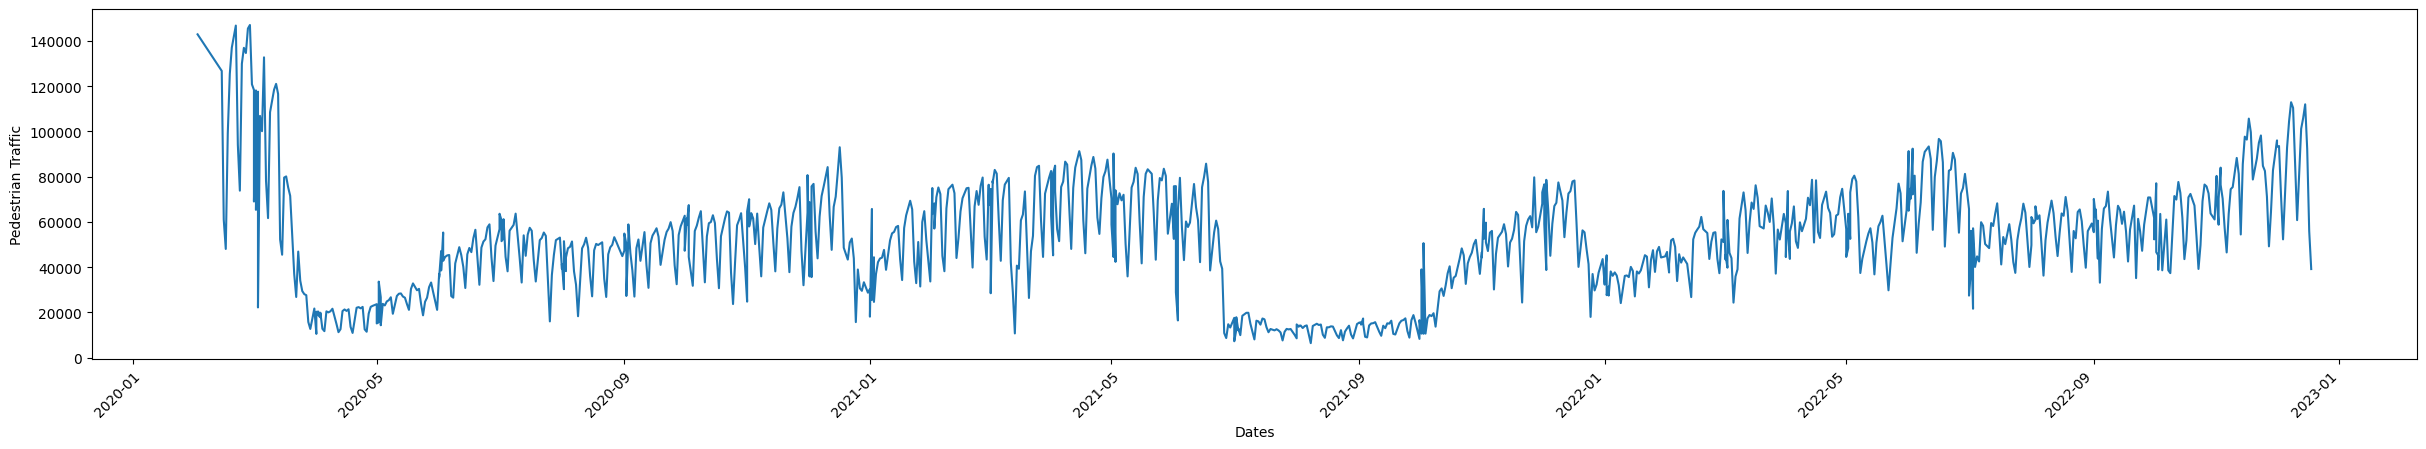

In [84]:
# now to plot the figure using matplotlib
fig = plt.figure(figsize=(30,5))
ax = fig.add_subplot(1,1,1)
# fit the dates
plt.subplots_adjust(bottom = 0.2, top = 0.9)
 #rotate the x-axis values
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
# set the lables for x and y
ax.set_ylabel('Pedestrian Traffic')
ax.set_xlabel('Dates')

x,y = grouped_items.shortdate, grouped_items.totalcount

# plt.plot(x,y, scaley=True, scalex=True, color="red")
plt.plot(x,y)
plt.show()

In [85]:
# Now to create an animation 
def animate(i):

	xs.append(grouped_items.shortdate[i])
	ys.append(grouped_items.totalcount[i])
	ax.relim()
	ax.autoscale()
	plt.plot(xs,ys, scaley=True, scalex=True, color="green")


In [107]:
arr = np.array([1, 3, 1, 4, 5, 6, 7])

for i,index in enumerate(arr):
    print(arr[-5:index])
    


TypeError: cannot unpack non-iterable numpy.int64 object